In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Data

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_colwidth', None)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/University Project/data_updated.csv')

img_path = '/content/drive/MyDrive/Colab Notebooks/University Project/images/'

df = df.applymap(lambda x: x.replace("\n", " ") if isinstance(x, str) else x)

# Data Preprocessing

In [ ]:
# Define item categories
main_items = [
    "Dabl McRoyal Barkekyu", "McRoyal Barbekyu", "Dabl Big Tasty™ (Ət)", "Big Tasty™ (Ət)","Dabl Big Tasty™ (Toyuq)", "Big Tasty™ (Toyuq)", "Dabl Big Mac™", "Big Mac™","Dabl Royal Çizburger", "Royal Çizburger", "Dabl McChicken™", "McChicken™","Dabl Filet-O-Fish™", "Filet-O-Fish™", "Bif Freş", "Çiken Freş", "Fiş Freş","Sezar Roll", "Şaurma Roll", "Dabl Mini Tasty", "Mini Tasty", "Tripl Çizburger","Dabl Çizburger", "Çizburger", "Tripl Hamburger", "Dabl Hamburger", "Hamburger","Dabl Çikenburger", "Çikenburger"
]

snack_keywords = [
    "Çiken McNuggets", "Frenç Frayz", "Kənd kartofu", "Soğan halqaları", "Krevetlər","Çiken Bayts", "Toyuq qanadları", "Çiken strips", "Çiken boks"
]
portion_keywords = [
    "(Kiçik)", "(Orta)", "(Böyük)", "(Ekstra)",
    "(0.2L)","(0.25L)", "(0.3L)", "(0.4L)","(0.5L)",
    "(3 əd.)", "(4 əd.)", "(5 əd.)", "(6 əd.)",
    "(8 əd.)", "(9 əd.)", "(10 əd.)", "(20 əd.)"
]

drink_items = [
    "Limonad Marakuya", "Coca-Cola™", "Fanta™", "Sprite™", "Qazlı su", "Portağal şirəsi", "Cappy Şirəsi", "Ayran", "Bonaqua"
]

souse_items = [
    "Kokteyl Sous", "Sezar sous", "“House” sous", "Ketçup", "Pendirli sous", "Mayonez","Xardal", "Turşa-Şirin sous", "Sarımsaqlı sous", "Barbekyu sousu", "Acılı sous","Habanero sous (40ml)", "Dor Blu sous (40ml)"
]

dessert_items = [
    "McFlurry™ (Karamel Kit-Kat™)", "McFlurry™ (Çiyələk Kit-Kat™)", "McFlurry™ (Kit-Kat™)","MakSandey Dondurması (Karamel)", "MakSandey Dondurması (Şokolad)","MakSandey Dondurması (Strawberry)", "Südlü Kokteyl (Çiyələk)", "Südlü Kokteyl (Şokolad)","Südlü Kokteyl (Vanil)", "Maffin (Banan)", "Maffin (Qara qarağat)", "Maffin (Şokolad)","Maffin (Şokolad və plombir)", "Meyvəli Piroq (Albalı)", "Konus Dondurması"
]
# Define items to move to McCafe
coffee_items = [
    "Dabl Espresso", "Çay", "Qəhvə", "Latte", "Kapuçino", "İsti şokolad"
]
mccafe_items = [
    "Karamelli Frappe", "Şokoladlı Frappe", "Amerikano", "Kapuçino", "İkili Espresso", "Latte", "Latte makiato", "Mokko latte", "Raf", "Flet Uayt", "İsti şokolad", "Ays qəhvə", "Çaydan (qara)","Çaydan (meyvəli)","Çaydan (yaşıl)", "Şokoladlı krem ilə donat", "Vanil krem ilə donat", "Çiyələkli çizkeyk", "Amerika sayağı çizkeyk", "Alma piroqu", "Şokoladlı peçenye", "Kruassan", "Pendirli kruassan", "McPops™ (şokoladlı)", "McPops™ (giləmeyvə)"
]


# Helper functions
def remove_portion_tags(name):
    for tag in portion_keywords:
        name = name.replace(tag, "").strip()
    return name

def manual_classify(name):
    cleaned_name = remove_portion_tags(name)
    # Exact match for Main
    if cleaned_name in main_items:
        return "Main"
    # Partial match for Snack
    if any(keyword.lower() in cleaned_name.lower() for keyword in snack_keywords):
        return "Snack"
    # Exact match for Drink
    if cleaned_name in drink_items:
        return "Drink"
    # Exact match for Souse
    if cleaned_name in souse_items:
        return "Souse"
    # Exact match for Dessert
    if cleaned_name in dessert_items:
        return "Dessert"
    # Exact match for Coffee
    if cleaned_name in coffee_items:
        return "Coffee"
    # Exact match for McCafe
    if cleaned_name in mccafe_items:
        return "McCafe"
    # Default category
    return "Other"

# Apply classification
df["Category"] = df["Name"].apply(manual_classify)

# Split datasets
main_df = df[df["Category"] == "Main"]
snack_df = df[df["Category"] == "Snack"]
drink_df = df[df["Category"] == "Drink"]
dessert_df = df[df["Category"] == "Dessert"]
souse_df = df[df["Category"] == "Souse"]
other_df = df[df["Category"] == "Other"]
coffee_df = df[df["Category"] == "Coffee"]
mccafe_df = df[df["Category"] == "McCafe"]

# Summary
category_counts = {
    "Main": len(main_df),
    "Snack": len(snack_df),
    "Drink": len(drink_df),
    "Dessert": len(dessert_df),
    "Souse": len(souse_df),
    "Coffee": len(coffee_df),
    "McCafe": len(mccafe_df),
    "Other": len(other_df)
}

print(category_counts)


{'Main': 29, 'Snack': 23, 'Drink': 23, 'Dessert': 22, 'Souse': 12, 'Coffee': 15, 'McCafe': 22, 'Other': 70}


# Printing all DataFrames

In [ ]:
main_df

,ID,Name,Description,Allergens,Protein (g),Fat (g),Carbs (g),Energy (kcal),Image URL,Category
0,10,Hamburger,"Karamelləşdirilmiş bulkanın arasında 100% mal ətindən döyülmüş bifşteks, xardal, ketçup, soğan və duzlu xiyar dilimləri.","Xardal, Qlüten.",13.2,9.3,27.7,252.0,https://mcdonalds.az/images/7e2ebc7f8f56fbb9ea6374b5d7ad55e3.png,Main
1,11,Dabl Hamburger,"Karamelləşdirilmiş bulkanın arasında iki 100% mal ətindən döyülmüş bifşteks, xardal, ketçup, soğan və duzlu xiyar dilimləri.","Xardal, Qlüten.",20.0,16.0,31.0,350.0,https://mcdonalds.az/images/41f4b61d6b03de45443abbb89a2e4422.png,Main
2,12,Tripl Hamburger,"Yumşaq bulkasının arasında 3 ədəd 100% mal ətindən iştahaçan bifşteks, ketçup, xardal, duzlu xıyar və soğan.","Xardal, Qlüten.",27.0,20.0,31.0,420.0,https://mcdonalds.az/images/fe36ad169599d4ea770858b136e9e0eb.png,Main
3,13,Çizburger,"Karamelləşdirilmiş bulkanın arasında 100% mal ətindən döyülmüş bifşteks, Çedder pendirinin dilimi, xardal, ketçup, soğan və duzlu xiyar dilimləri.","Xardal, Süd, Soya, Yumurta, Qlüten.",16.1,13.1,28.5,300.0,https://mcdonalds.az/images/21a29d5d8d422d969e85b2c83e6ead97.png,Main
4,14,Dabl Çizburger,"Karamelləşdirilmiş bulkanın arasında iki ədəd 100% mal ətindən döyülmüş bifşteks, 2 Çedder pendirinin dilimi, xardal, ketçup, soğan və duzlu xiyar dilimləri.","Xardal, Süd, Soya, Yumurta, Qlüten.",27.0,22.0,34.0,443.0,https://mcdonalds.az/images/c3810fe9a08f596796758778288d4346.png,Main
5,15,Tripl Çizburger,"Yumşaq bulkasının arasında 3 ədəd 100% mal ətindən iştahaçan bifşteks, 3 ədəd əridilmiş çeddar pendiri, ketçup, xardal, duzlu xıyar və soğan.","Xardal, Süd, Soya, Yumurta, Qlüten.",37.0,32.0,34.0,578.0,https://mcdonalds.az/images/c9023fbb49dea6116cc7ba7f551c3b82.png,Main
6,16,Çikenburger,Təzə kahı və xüsusi McChicken® sousu ilə dadlandırılmış və karamelli bulkada verilən suxarıya batırılmış qızardılmış toyuq kotleti.,"Xardal, Yumurta, Qlüten.",12.0,15.0,31.0,339.0,https://mcdonalds.az/images/e2ae3bbc9f9fba3a4b4e2e1770880023.png,Main
7,17,McChicken™,"Karamelləşdirilmiş bulkanın arasında suxarıya batırılmış, qızardılmış toyuq kotleti, təzə Aysberq salatı və xüsusi McChicken™ sousu.","Xardal, Kərəviz, Yumurta, Qlüten, Küncüt tumları.",16.0,27.0,45.0,480.0,https://mcdonalds.az/images/a4daa7dd0522cd28d8a4bd148d5721c2.png,Main
8,18,Dabl McChicken™,"Karamelləşdirilmiş bulkanın arasında suxarıya batırılmış, qızardılmış iki toyuq kotleti, təzə Aysberq salatı və xüsusi McChicken™ sousu.","Xardal, Kərəviz, Yumurta, Qlüten, Küncüt tumları.",32.5,40.3,54.0,712.0,https://mcdonalds.az/images/2f32b3ec9f8a03bcf9577df2e1b58830.png,Main
9,19,Filet-O-Fish™,"İsti, yumşaq bulkanın arasında yaxşıca qızardılmış balıq filesi (xordalılar sinfi), yarım dilim Çedder pendiri və Tar-Tar sousu.","Xardal, Süd, Soya, Yumurta, Balıq, Qlüten.",11.0,15.0,26.0,282.0,https://mcdonalds.az/images/4e4af6b5506f1a3524f34301ad632fce.png,Main


In [ ]:
snack_df

,ID,Name,Description,Allergens,Protein (g),Fat (g),Carbs (g),Energy (kcal),Image URL,Category
19,29,Çiken McNuggets (4 əd.),"Fritürda, unda qızardılmış xırçıldayan toyuq filesinin dilimləri.","Kərəviz, Qlüten.",11.0,9.0,12.0,179.0,https://mcdonalds.az/images/3fc7ffafe2014a470c7c048ed9bf89af.png,Snack
20,33,Krevetlər (4 əd.),"Fritürda, unda qızardılmış xırçıldayan krevet. 1000 ada sousu ilə təqdim olunur.","Soya, Balıq, Qlüten.",10.0,9.0,15.0,180.0,https://mcdonalds.az/images/ef6ed48922ff9d705304228004281b41.png,Snack
21,35,Soğan halqaları (5 əd.),Unda qızardılmış təzə soğan dilimləri.,"Süd, Qlüten.",4.0,11.0,28.0,230.0,https://mcdonalds.az/images/806e65fd0098f57175341b08850a650c.jpg,Snack
25,40,Happy Meal™ (Çiken McNuggets ilə),"""Happy Meal"" əsas yemək, içki, əlavə yemək və 1 oyuncaqdan ibarətdir. Əsas yemək seçimi: Çiken McNuggets (4 ədəd); İçki seçimi: Ice Tea, meyvə şirəsi, içki 0,25l; Əlavə yemək seçimi: kiçik kartof fri və ya alma.","Kərəviz, Qlüten.",21.0,12.0,35.0,330.0,https://mcdonalds.az/images/3adf5f66c4d2c04ecfd72574e98062ba.png,Snack
26,41,Frenç Frayz (Kiçik),Fritürda qızılı rəngədək qızardılmış və bir balaca duzlanmış xırçıldayan kartof çubuqları.,NaN,2.8,11.0,29.0,231.0,https://mcdonalds.az/images/31323ee526b0ca6b84abb356218c69ca.png,Snack
27,45,Kənd kartofu (Orta),"İştahalı və dadlı, fritürda qızardılmış ədviyyatlı kartof dilimləri.",NaN,3.0,11.0,31.0,243.0,https://mcdonalds.az/images/30e5dd46d3aaceb91fbba9a5474655cc.jpg,Snack
35,55,Frenç Frayz (Orta),Fritürda qızılı rəngədək qızardılmış və bir balaca duzlanmış xırçıldayan kartof çubuqları.,NaN,2.8,11.0,29.0,231.0,https://mcdonalds.az/images/e9dcbddeed68b0bebe2b18ac599cb1e6.png,Snack
36,56,Frenç Frayz (Böyük),Fritürda qızılı rəngədək qızardılmış və bir balaca duzlanmış xırçıldayan kartof çubuqları.,NaN,2.8,11.0,29.0,231.0,https://mcdonalds.az/images/b73712825bb33395621d3942747e4904.png,Snack
37,57,Frenç Frayz (Ekstra),Fritürda qızılı rəngədək qızardılmış və bir balaca duzlanmış xırçıldayan kartof çubuqları.,NaN,2.8,11.0,29.0,231.0,https://mcdonalds.az/images/8bc07153987f86293ddb607b01acc5c7.png,Snack
96,116,Çiken McNuggets (6 əd.),"Fritürda, unda qızardılmış xırçıldayan toyuq filesinin dilimləri.","Kərəviz, Qlüten.",11.0,9.0,12.0,179.0,https://mcdonalds.az/images/22d094911c5c728c5a8a3f819fb48a14.png,Snack


In [ ]:
drink_df

,ID,Name,Description,Allergens,Protein (g),Fat (g),Carbs (g),Energy (kcal),Image URL,Category
38,58,Coca-Cola™ (Kiçik),Sərinləşdirici içki.,NaN,NaN,NaN,NaN,NaN,https://mcdonalds.az/images/944fd4678c4bab91146f551969effcc1.jpg,Drink
39,59,Coca-Cola™ (Orta),Sərinləşdirici içki.,NaN,NaN,NaN,NaN,NaN,https://mcdonalds.az/images/741b302ffda5791904f94c1d00975da1.jpg,Drink
40,60,Coca-Cola™ (Böyük),Sərinləşdirici içki.,NaN,NaN,NaN,NaN,NaN,https://mcdonalds.az/images/2dd849c075595b3e1afa61052c7a55a1.jpg,Drink
41,61,Coca-Cola™ (Ekstra),Sərinləşdirici içki.,NaN,NaN,NaN,NaN,NaN,https://mcdonalds.az/images/8d77ac944dd8b7ed61dda529c0be09dd.jpg,Drink
42,62,Fanta™ (Kiçik),Sərinləşdirici içki.,NaN,NaN,NaN,NaN,NaN,https://mcdonalds.az/images/c1bdaffcaa6d26f05dbc3cd10d5dc91d.jpg,Drink
43,63,Fanta™ (Orta),Sərinləşdirici içki.,NaN,NaN,NaN,NaN,NaN,https://mcdonalds.az/images/52d36dd322927326544571d9ec09f347.jpg,Drink
44,64,Fanta™ (Böyük),Sərinləşdirici içki.,NaN,NaN,NaN,NaN,NaN,https://mcdonalds.az/images/d0e85c24981ddde8008c80c80f7c6f05.jpg,Drink
45,65,Fanta™ (Ekstra),Sərinləşdirici içki.,NaN,NaN,NaN,NaN,NaN,https://mcdonalds.az/images/54abe395562f594f1619a2ebe6806086.jpg,Drink
46,66,Sprite™ (Kiçik),Sərinləşdirici içki.,NaN,NaN,NaN,NaN,NaN,https://mcdonalds.az/images/6f06f0efc8bcadf88fdfedff3175e7d8.jpg,Drink
47,67,Sprite™ (Orta),Sərinləşdirici içki.,NaN,NaN,NaN,NaN,NaN,https://mcdonalds.az/images/a2df072f2d02ea461c789f457851ae1b.jpg,Drink


In [ ]:
dessert_df

,ID,Name,Description,Allergens,Protein (g),Fat (g),Carbs (g),Energy (kcal),Image URL,Category
73,93,Südlü Kokteyl (Şokolad) (0.25L),"Yüksək keyfiyyətli, təzə süd və sirop qarışığından hazırlanmış qatı və ətirli kokteyl.","Süd, Soya, Sulfar dioksid və sulfitlər.",6.0,5.0,43.0,247.0,https://mcdonalds.az/images/ecbd9e200fb4f54f95b720b5c2c0f5c0.jpg,Dessert
74,94,Südlü Kokteyl (Şokolad) (0.4L),"Yüksək keyfiyyətli, təzə süd və sirop qarışığından hazırlanmış qatı və ətirli kokteyl.","Süd, Soya, Sulfar dioksid və sulfitlər.",6.0,5.0,43.0,247.0,https://mcdonalds.az/images/ee6db7979eef34535bc6eff7ec4cae29.jpg,Dessert
75,95,Südlü Kokteyl (Şokolad) (0.5L),"Yüksək keyfiyyətli, təzə süd və sirop qarışığından hazırlanmış qatı və ətirli kokteyl.","Süd, Soya, Sulfar dioksid və sulfitlər.",6.0,5.0,43.0,247.0,https://mcdonalds.az/images/bd35be2291d608f45b3bcffd7f67dc84.jpg,Dessert
76,96,Südlü Kokteyl (Vanil) (0.25L),"Yüksək keyfiyyətli, təzə süd və sirop qarışığından hazırlanmış qatı və ətirli kokteyl.",Süd.,6.0,4.0,45.0,244.0,https://mcdonalds.az/images/d30948d2e54e11a95bda3fde55511d25.jpg,Dessert
77,97,Südlü Kokteyl (Vanil) (0.4L),"Yüksək keyfiyyətli, təzə süd və sirop qarışığından hazırlanmış qatı və ətirli kokteyl.",Süd.,6.0,4.0,45.0,244.0,https://mcdonalds.az/images/84d11e8cf7e608daf092dc48334ba4ef.jpg,Dessert
78,98,Südlü Kokteyl (Vanil) (0.5L),"Yüksək keyfiyyətli, təzə süd və sirop qarışığından hazırlanmış qatı və ətirli kokteyl.",Süd.,6.0,4.0,45.0,244.0,https://mcdonalds.az/images/73bf6ffb3b27b26e98a4ab67bd9cdec8.jpg,Dessert
79,99,Südlü Kokteyl (Çiyələk) (0.25L),"Yüksək keyfiyyətli, təzə süd və sirop qarışığından hazırlanmış qatı və ətirli kokteyl.",Süd.,6.0,4.0,45.0,244.0,https://mcdonalds.az/images/341604d3ce1bc4cba24bec91678129ed.jpg,Dessert
80,100,Südlü Kokteyl (Çiyələk) (0.4L),"Yüksək keyfiyyətli, təzə süd və sirop qarışığından hazırlanmış qatı və ətirli kokteyl.",Süd.,6.0,4.0,45.0,244.0,https://mcdonalds.az/images/7f22a706324dac36a645e1f827a92520.jpg,Dessert
81,101,Südlü Kokteyl (Çiyələk) (0.5L),"Yüksək keyfiyyətli, təzə süd və sirop qarışığından hazırlanmış qatı və ətirli kokteyl.",Süd.,6.0,4.0,45.0,244.0,https://mcdonalds.az/images/ef0969ed74263070ff6e0139039a9768.jpg,Dessert
82,102,McFlurry™ (Kit-Kat™),"Şokolad (Kit-Kat™ ilə) əlavəli, təbii, üzlü süddən hazırlanmış yumşaq qaymaqlı dondurma.","Fındıq, Süd, Soya, Qlüten.",7.0,11.0,71.0,406.0,https://mcdonalds.az/images/81a1e4799865050ac461373d95c5ffaa.png,Dessert


In [ ]:
souse_df

,ID,Name,Description,Allergens,Protein (g),Fat (g),Carbs (g),Energy (kcal),Image URL,Category
28,48,Ketçup,İştahalı tomat sousu.,Kərəviz.,NaN,NaN,NaN,NaN,https://mcdonalds.az/images/33b126e548fbf0ae3506576f015ba50b.jpg,Souse
29,49,Mayonez,Dadlı və ətirli sous.,"Xardal, Yumurta.",NaN,NaN,NaN,NaN,https://mcdonalds.az/images/057f78db959e32d84c70c332a9de845c.jpg,Souse
30,50,Barbekyu sousu,"İştahaçan, ədviyyatlı sous.","Xardal, Kərəviz, Yumurta",0.0,0.0,11.0,47.0,https://mcdonalds.az/images/199f265a7c5431a792e37006e9166a8d.jpg,Souse
31,51,Turşa-Şirin sous,"Şirin dadlı, ətirli sous.","Süd, Kərəviz, Qlüten.",0.0,0.0,12.0,49.0,https://mcdonalds.az/images/2e2a8ab4054a610176f6acd3c49a8365.jpg,Souse
32,52,Pendirli sous,Pendirdən hazırlanmış nəfis dadlı sous.,"Süd, Yumurta, Sulfar dioksid.",NaN,NaN,NaN,NaN,https://mcdonalds.az/images/042911bec30300dcc2e5ff2eba20f039.jpg,Souse
33,53,Xardal,Acı və yumşaq dadlı əsl xardal sousu.,"Xardal, Yumurta.",0.0,3.0,7.0,62.0,https://mcdonalds.az/images/bf697c4efbeb62ba1c6571bd42eaa7b8.png,Souse
104,124,Sarımsaqlı sous,Ədviyyatlı sarımsağlı sous.,"Xardal, Yumurta.",NaN,NaN,NaN,NaN,https://mcdonalds.az/images/a96d8ec2df51bfd6149db759d7772619.png,Souse
125,153,“House” sous,"Allergenlər: Xardal, Süd, Yumurta, Kərəviz.","Xardal, Süd, Yumurta, Kərəviz.",1.0,11.0,7.0,141.0,https://mcdonalds.az/images/6a3a8dae066d83e9d0fb6f098f437436.png,Souse
127,155,Sezar sous,"Allergenlər: Süd, Yumurta.","Süd, Yumurta.",2.0,28.0,8.0,304.0,https://mcdonalds.az/images/901ce4e7980201578b556a7873a07d0a.png,Souse
130,158,Kokteyl Sous,Zəngin dadlı iştahaçan sous.,"Xardal, Kərəviz, Süd, Yumurta.",3.0,30.0,NaN,329.0,https://mcdonalds.az/images/87bde46b7a061c434175d8bf9bb8fea1.png,Souse


In [ ]:
other_df

,ID,Name,Description,Allergens,Protein (g),Fat (g),Carbs (g),Energy (kcal),Image URL,Category
22,37,Happy Meal™ (Hamburger ilə),"""Happy Meal"" əsas yemək, içki, əlavə yemək və 1 oyuncaqdan ibarətdir. Əsas yemək seçimi: Hamburger; İçki seçimi: Ice Tea, meyvə şirəsi, içki 0,25l; Əlavə yemək seçimi: kiçik kartof fri və ya alma.","Xardal, Qlüten.",21.0,10.0,53.0,390.0,https://mcdonalds.az/images/1228ef42ddf7c76f4aa295fc107e6de0.png,Other
23,38,Happy Meal™ (Çizburger ilə),"""Happy Meal"" əsas yemək, içki, əlavə yemək və 1 oyuncaqdan ibarətdir. Əsas yemək seçimi: Çizburger; İçki seçimi: Ice Tea, meyvə şirəsi, içki 0,25l; Əlavə yemək seçimi: kiçik kartof fri və ya alma.","Xardal, Süd, Soya, Yumurta, Qlüten.",16.0,16.0,74.0,501.0,https://mcdonalds.az/images/a34b5f4951bcf508eea5135edc2b4b40.png,Other
24,39,Happy Meal™ (Çikenburger ilə),"""Happy Meal"" əsas yemək, içki, əlavə yemək və 1 oyuncaqdan ibarətdir. Əsas yemək seçimi: Çikenburger; İçki seçimi: Ice Tea, meyvə şirəsi, içki 0,25l; Əlavə yemək seçimi: kiçik kartof fri və ya alma.","Xardal, Yumurta, Qlüten.",18.0,20.0,116.0,730.0,https://mcdonalds.az/images/a045b0fae1ccb57585175bdb27fab9ff.png,Other
34,54,1000 Ada sousu,Zəngin dadlı iştahaçan sous.,"Süd, Balıq, Qlüten.",NaN,NaN,NaN,NaN,https://mcdonalds.az/images/b9d28e5ad6a7ceed89ffdefa72dae1aa.png,Other
50,70,Ice Tea (Kiçik),Sərinləşdirici içki.,NaN,NaN,NaN,NaN,NaN,https://mcdonalds.az/images/f8348758b50d78a0ca3af19a42b84de4.jpg,Other
...,...,...,...,...,...,...,...,...,...,...
204,232,Cem,Maffin,NaN,NaN,NaN,NaN,NaN,https://mcdonalds.az/images/25a1f6a0b53957a616914fcd6baac775.png,Other
206,234,Habanero sous (40ml),"İştahaçan, ədviyyatlı sous.","Xardal, Yumurta.",0.0,31.0,8.0,313.0,https://mcdonalds.az/images/ed98e0e99b4d8131c728d92df3405d43.png,Other
208,236,Şampinyon delüks (ət),"Karamelləşdirilmiş bulkanın arasında 100% mal ətindən döyülmüş bifşteks, qızarılmış göbələk, Emmental pendiri, “deluxe” sousu və duzlu xiyar dilimləri.","Xardal ,Yumurta, Süd, Glüten.",32.0,33.0,49.0,623.0,https://mcdonalds.az/images/e8edf5122942353de6c6bd18da56718a.png,Other
209,237,Şampinyon delüks (toyuq),"Karamelləşdirilmiş bulkanın arasında qızardılmış toyuq kotleti, qızarılmış göbələk, Emmental pendiri, “deluxe” sousu və duzlu xiyar dilimləri.","Xardal ,Yumurta, Süd, Kərəviz, Glüten.",33.0,32.0,64.0,679.0,https://mcdonalds.az/images/dad2e355b385d82edcf1d42d53982545.png,Other


In [ ]:
mccafe_df

,ID,Name,Description,Allergens,Protein (g),Fat (g),Carbs (g),Energy (kcal),Image URL,Category
132,160,Amerikano (0.3L),"Rainforest Alliance Certified™ ticarət nişanlı espressomuzun üzərinə qaynar su əlavə etməklə hazırlanan sadə, ətirli Amerikano.",NaN,NaN,NaN,NaN,NaN,https://mcdonalds.az/images/84c1338fc7ce86abede76b38a92fa5d1.jpg,McCafe
133,161,Amerikano (0.4L),"Rainforest Alliance Certified™ ticarət nişanlı espressomuzun üzərinə qaynar su əlavə etməklə hazırlanan sadə, ətirli Amerikano.",NaN,NaN,NaN,NaN,NaN,https://mcdonalds.az/images/2956b1578e57e13dbabf3be6421c77fe.jpg,McCafe
134,162,İkili Espresso,"Rainforest Alliance Certified™ ticarət nişanlı espressomuzun üzərinə qaynar su əlavə etməklə hazırlanan sadə, ətirli Espresso.",NaN,0.0,0.0,0.0,2.0,https://mcdonalds.az/images/f6e97d9e002fead1123ccf7f0685600a.jpg,McCafe
138,166,Mokko latte (0.4L),"Ekoloji təmiz mənbələrdən – Rainforest Alliance sertifikatlı fermalardan toplanmış espresso dənlərindən hazırlanan McCafé® Mokko latte, buğa verilmiş üzlü süd və şokolad siropu ilə. Çalınmış qaymaqla bəzədilir, üzərinə şokolad pudrası səpilir.",Süd.,11.0,9.0,32.0,256.0,https://mcdonalds.az/images/ff7f64516112b7c4f7d8442b16f1b8a2.jpg,McCafe
139,167,Latte makiato (0.3L),"McCafé® Mocha latte resepti Rainforest Alliance Certified™ fermalarından ekoloji təmiz şəkildə toplanmış espresso dənələrindən, üzlü süddən və şokolad siropundan hazırlanır, çalınmış qaymaq və şokolad tozu əlavə edilir.",Süd.,20.0,7.0,19.0,226.0,https://mcdonalds.az/images/74b154563db8104c864c715d714470ea.jpg,McCafe
140,168,Latte makiato (0.4L),"McCafé® Mocha latte resepti Rainforest Alliance Certified™ fermalarından ekoloji təmiz şəkildə toplanmış espresso dənələrindən, üzlü süddən və şokolad siropundan hazırlanır, çalınmış qaymaq və şokolad tozu əlavə edilir.",Süd.,20.0,7.0,19.0,226.0,https://mcdonalds.az/images/2c1fe51b43807e27b083d0eab3014ece.jpg,McCafe
141,169,Raf (0.4L),"Ekoloji təmiz mənbələrdən – Rainforest Alliance sertifikatlı fermalardan toplanmış espresso dənlərindən hazırlanan McCafé® Raf latte, buğa verilmiş üzlü süd, çalınmış qaymaq və vanilli sirop ilə.",Süd.,7.0,24.0,19.0,316.0,https://mcdonalds.az/images/030f1e3d3408eddde80e3f6c630cec18.jpg,McCafe
142,170,Flet Uayt (0.2L),Buğa verilmiş və yüngülcə köpükləndirilmiş orqanik süd ilə qarışdırılmış ikiqat espresso porsiyası ilə McCafé® Flet.,Süd.,5.0,6.0,8.0,113.0,https://mcdonalds.az/images/601eb6b98407dd3c2b2dd73bdd0b6e17.jpg,McCafe
144,172,Ays qəhvə (0.3L),"McCafé® Ays qəhvə 100% Arabika dənəcikləri, çalınmış qaymaqdan hazırlanmış təravətləndirici və sərinləşdirici qəhvədir. Sirop seçimi: karamelli, fındıqlı, fransız vanili, şəkərsiz fransız vanili.",Süd.,3.0,3.0,21.0,130.0,https://mcdonalds.az/images/88ec6d086f5a98b8ca3570998b93509e.jpg,McCafe
145,173,Çaydan (qara) (0.4L),NaN,NaN,NaN,NaN,NaN,NaN,https://mcdonalds.az/images/dd5639606c2bc2aba51fa1d1a9159a83.jpg,McCafe


In [ ]:
coffee_df

,ID,Name,Description,Allergens,Protein (g),Fat (g),Carbs (g),Energy (kcal),Image URL,Category
18,28,Qəhvə (Kiçik),"“Paulig” şirkətinin istehsalı olan seçilmiş, təzə üyüdülmüş və qovrulmuş qara qəhvə.",NaN,0.0,0.0,0.0,29.0,https://mcdonalds.az/images/86a64dec13b990904e28e024036fd338.jpg,Coffee
65,85,Qəhvə (Böyük),"“Paulig” şirkətinin istehsalı olan seçilmiş, təzə üyüdülmüş və qovrulmuş qara qəhvə.",NaN,0.0,0.0,0.0,29.0,https://mcdonalds.az/images/cfe6e3bad53d667c4ec6c3256385205b.png,Coffee
66,86,Dabl Espresso,Heç bir əlavə olmadan üyüdülmüş qəhvəli filtrdan təzyiq altında qaynar suyun keçməsi nəticəsində alınan qəhvə içkisi. McDonald’s-da yalnız “Paulig” şirkətinin seçilmiş və təzə üyüdülmüş qəhvəsindən istifadə olunur.,NaN,NaN,NaN,NaN,NaN,https://mcdonalds.az/images/0927502ad5923d4070321dca23931b19.jpg,Coffee
67,87,Kapuçino (Kiçik),"Təzə, üzlü və köpüklü süd ilə espressonun dadlı qarışığı. ""McDonald’s""da yalnız “Paulig” şirkətinin seçilmiş və təzə üyüdülmüş qəhvəsindən istifadə olunur.",Süd.,3.0,4.0,5.0,78.0,https://mcdonalds.az/images/807a913515d0a235cdfc4007602b3917.jpg,Coffee
68,88,Kapuçino (Böyük),"Təzə, üzlü və köpüklü süd ilə espressonun dadlı qarışığı. ""McDonald’s""da yalnız “Paulig” şirkətinin seçilmiş və təzə üyüdülmüş qəhvəsindən istifadə olunur.",Süd.,3.0,4.0,5.0,78.0,https://mcdonalds.az/images/468dccf96ae6d93ef84d298f9ba1c793.png,Coffee
69,89,Latte (Kiçik),"Təzə, üzlü süd ilə espressonun dadlı qarışığı. ""McDonald’s""da yalnız “Paulig” şirkətinin seçilmiş və təzə üyüdülmüş qəhvəsindən istifadə olunur.",Süd.,3.0,4.0,6.0,78.0,https://mcdonalds.az/images/039ba467bfb9bfcc66f4795b0d199b5f.jpg,Coffee
70,90,Latte (Böyük),"Təzə, üzlü süd ilə espressonun dadlı qarışığı. ""McDonald’s""da yalnız “Paulig” şirkətinin seçilmiş və təzə üyüdülmüş qəhvəsindən istifadə olunur.",Süd.,3.0,4.0,6.0,78.0,https://mcdonalds.az/images/6cb392cb9564aa58a793545daeb4e963.png,Coffee
71,91,İsti şokolad (Kiçik),İsti Şokolad – südün əlavəsi ilə təbii kakao əsasında hazırlanmış dadlı içkidir.,"Süd, Soya.",8.0,18.0,31.0,319.0,https://mcdonalds.az/images/1cb8de5ac79bbd284643fd864bf333ce.jpg,Coffee
72,92,İsti şokolad (Böyük),İsti Şokolad – südün əlavəsi ilə təbii kakao əsasında hazırlanmış dadlı içkidir.,"Süd, Soya.",8.0,18.0,31.0,319.0,https://mcdonalds.az/images/feac8dffdc94e20d2cc29435a12c5b19.png,Coffee
103,123,Çay (0.3L),Dabl Espresso,NaN,NaN,NaN,NaN,NaN,https://mcdonalds.az/images/69ee071d4bb07fba16f1b6a94f51438c.png,Coffee


# Merge all data in one csv file

In [ ]:
# # Combine all the categorized DataFrames
# merged_df = pd.concat([main_df, snack_df, drink_df, dessert_df, souse_df, coffee_df, mccafe_df, other_df])

# # Optional: Reset index
# merged_df.reset_index(drop=True, inplace=True)

# # Save to CSV
# merged_df.to_csv("mcdonalds_categorized_new.csv", index=False)


In [ ]:
# data_main = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/University Project/mcdonalds_categorized_new.csv')
# data_main

# Recommendation with Colab

## 1. Handle Missing Values in Colab interface

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

numeric_columns = main_df.select_dtypes(include=['float64', 'int64']).columns
main_df[numeric_columns] = main_df[numeric_columns].fillna(main_df[numeric_columns].mean())

## 2. Normalize Nutritional Features

In [ ]:
features = ['Protein (g)', 'Fat (g)', 'Carbs (g)', 'Energy (kcal)']
scaler = MinMaxScaler()
main_df[features] = scaler.fit_transform(main_df[features])

## 3. Compute Nutritional Cosine Similarity

In [ ]:
cosine_sim_nutritional = cosine_similarity(main_df[features])

## 4. Preprocess Text Data (Name + Allergens)

In [ ]:
main_df['Name_Allergens'] = main_df['Name'].astype(str) + ' ' + main_df['Allergens'].fillna('').astype(str)

# Convert text into TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(main_df['Name_Allergens'])

## 5.  Compute Text Cosine Similarity

In [ ]:
cosine_sim_text = cosine_similarity(tfidf_matrix, tfidf_matrix)

## 6. Combine Similarities

In [ ]:
alpha = 0.5  # Weight for nutritional similarity
beta = 0.5   # Weight for text similarity
combined_sim = alpha * cosine_sim_nutritional + beta * cosine_sim_text

## 7.  Recommendation Function

In [ ]:
def get_recommendations(item_name, data, combined_sim, num_recommendations=5):
    try:
        idx = data[data['Name'] == item_name].index[0]
    except IndexError:
        print(f"Item '{item_name}' not found in the data.")
        return pd.DataFrame()

    sim_scores = list(enumerate(combined_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num_recommendations+1]
    item_indices = [i[0] for i in sim_scores]

    return data[['Name', 'Image URL']].iloc[item_indices]

## 8. Display Target and Recommendations (With Images)

In [ ]:
import requests
from PIL import Image
import matplotlib.pyplot as plt
import io

# Step 8: Visualize target and recommendations
target_item_name = 'Big Mac'
num_rec_to_display = 3

recommended_items_df = get_recommendations(target_item_name, main_df, combined_sim, num_recommendations=num_rec_to_display)

try:
    target_item_data_row = main_df[main_df['Name'] == target_item_name].iloc[0]
    target_item_name_display = target_item_data_row['Name']
    target_image_url = target_item_data_row['Image URL']
    target_item_found = True
except IndexError:
    print(f"Target item '{target_item_name}' not found.")
    target_item_found = False

if target_item_found:
    total_items = 1 + len(recommended_items_df)
    fig, axes = plt.subplots(1, total_items, figsize=(12 * total_items, 10))

    if total_items == 1:
        axes = [axes]

    # Target item display
    try:
        response_target = requests.get(target_image_url)
        img_target = Image.open(io.BytesIO(response_target.content))
        axes[0].imshow(img_target)
        axes[0].set_title(f"Target:\n{target_item_name_display}", fontsize=48)
        axes[0].axis('off')
    except Exception as e:
        print(f"Error loading target image: {e}")
        axes[0].set_title("Target Image Error", fontsize=48)
        axes[0].axis('off')

    # Recommended items
    for i, (index, row) in enumerate(recommended_items_df.iterrows()):
        item_name = row['Name']
        image_url = row['Image URL']
        try:
            response_rec = requests.get(image_url)
            img_rec = Image.open(io.BytesIO(response_rec.content))
            axes[i + 1].imshow(img_rec)
            axes[i + 1].set_title(f"Recommendation: \n{item_name}", fontsize=40)
            axes[i + 1].axis('off')
        except Exception as e:
            print(f"Error loading recommended image: {e}")
            axes[i + 1].set_title("Image Error", fontsize=10)
            axes[i + 1].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("Cannot display recommendations as target item not found.")


Item 'Big Mac' not found in the data.
Target item 'Big Mac' not found.
Cannot display recommendations as target item not found.


In [ ]:
import numpy as np
import pandas as pd
from itertools import combinations
from collections import defaultdict
from sklearn.metrics import mean_squared_error

# 1) Build ground truth by Category
gt = defaultdict(list)
for i, cat in enumerate(main_df['Category']):
    relevant = main_df[main_df['Category'] == cat].index.tolist()
    if i in relevant:
        relevant.remove(i)
    gt[i] = relevant

In [ ]:
# 2) Precision@K & Recall@K
def precision_recall_item_item(sim, gt, K):
    ps, rs = [], []
    for i, relevant in gt.items():
        sims = sorted(enumerate(sim[i]), key=lambda x: x[1], reverse=True)
        neigh = [j for j,_ in sims if j!=i][:K]
        ps.append(len(set(neigh)&set(relevant)) / K)
        rs.append(len(set(neigh)&set(relevant)) / len(relevant))
    return np.mean(ps), np.mean(rs)

In [ ]:
# 3) Diversity@K
def diversity_item_item(sim, K):
    N = sim.shape[0]
    divers = []
    for i in range(N):
        sims = sorted(enumerate(sim[i]), key=lambda x: x[1], reverse=True)
        neigh = [j for j,_ in sims if j!=i][:K]
        dissims = [1 - sim[a,b] for a,b in combinations(neigh, 2)]
        divers.append((2/(K*(K-1))) * sum(dissims) if dissims else 0.)
    return np.mean(divers)

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt

# 4) Reconstruction RMSE
features = ['Protein (g)','Fat (g)','Carbs (g)','Energy (kcal)']
X = main_df[features].values

def rmse_reconstruction(X, sim, K):
    preds, trues = [], []
    N = X.shape[0]
    for i in range(N):
        sims = sorted(enumerate(sim[i]), key=lambda x: x[1], reverse=True)
        neigh = [j for j,_ in sims if j!=i][:K]
        weights = np.array([sim[i,j] for j in neigh])
        if weights.sum() == 0:
            pred = X.mean(axis=0)
        else:
            pred = (weights[:,None]*X[neigh]).sum(axis=0) / weights.sum()
        preds.append(pred)
        trues.append(X[i])
    preds = np.vstack(preds)
    trues = np.vstack(trues)
    mse = mean_squared_error(trues, preds)      # defaults to returning MSE
    return sqrt(mse)                            # take sqrt to get RMSE



In [ ]:
# # 5) Run for various K
# results = []
# for K in [1,2,4,5,7, 10, 15, 20,25,30]:
#     p, r = precision_recall_item_item(combined_sim, gt, K)
#     d    = diversity_item_item(combined_sim, K)
#     rmse = rmse_reconstruction(X, combined_sim, K)
#     results.append({'K':K, 'Prec@K':p, 'Rec@K':r, 'Div@K':d, 'RMSE':rmse})

# import pandas as pd
# print(pd.DataFrame(results).set_index('K'))


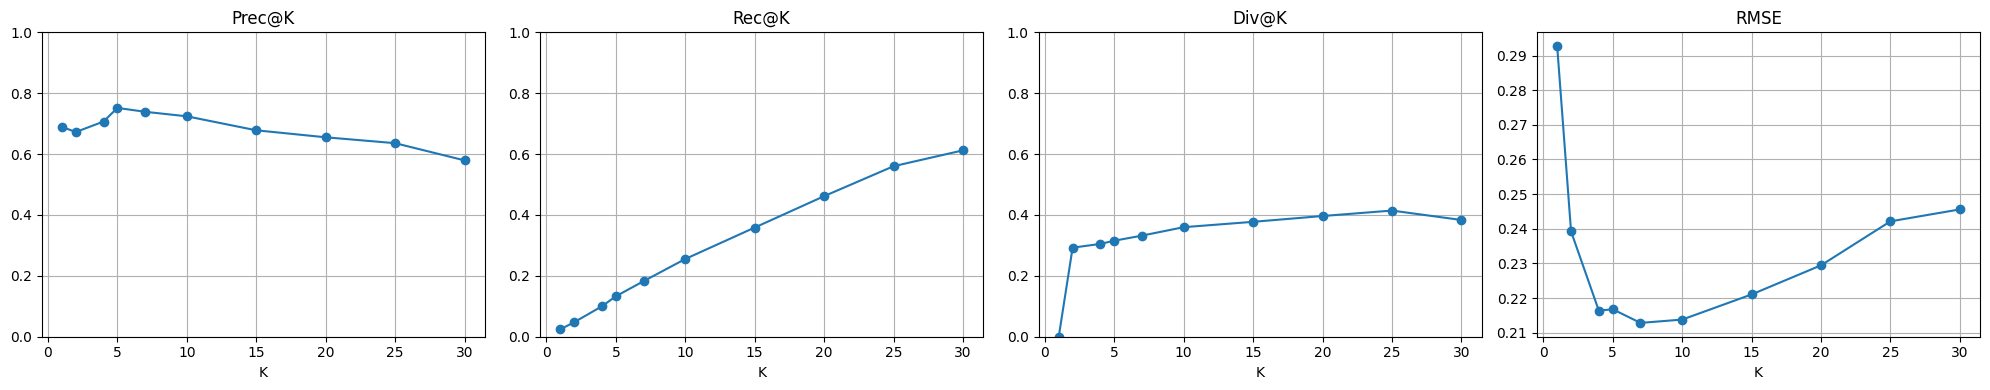

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Updated results with more K values
results = [
    {'K': 1, 'Prec@K': 0.689655, 'Rec@K': 0.024418, 'Div@K': 0.000000, 'RMSE': 0.292694},
    {'K': 2, 'Prec@K': 0.672414, 'Rec@K': 0.047605, 'Div@K': 0.292525, 'RMSE': 0.239235},
    {'K': 4, 'Prec@K': 0.706897, 'Rec@K': 0.100051, 'Div@K': 0.304955, 'RMSE': 0.216391},
    {'K': 5, 'Prec@K': 0.751724, 'Rec@K': 0.132835, 'Div@K': 0.315438, 'RMSE': 0.216782},
    {'K': 7, 'Prec@K': 0.738916, 'Rec@K': 0.182521, 'Div@K': 0.332192, 'RMSE': 0.212852},
    {'K': 10, 'Prec@K': 0.724138, 'Rec@K': 0.255393, 'Div@K': 0.359880, 'RMSE': 0.213802},
    {'K': 15, 'Prec@K': 0.678161, 'Rec@K': 0.358629, 'Div@K': 0.377469, 'RMSE': 0.221054},
    {'K': 20, 'Prec@K': 0.655172, 'Rec@K': 0.461780, 'Div@K': 0.396553, 'RMSE': 0.229460},
    {'K': 25, 'Prec@K': 0.635862, 'Rec@K': 0.560175, 'Div@K': 0.414454, 'RMSE': 0.242153},
    {'K': 30, 'Prec@K': 0.579310, 'Rec@K': 0.612281, 'Div@K': 0.383489, 'RMSE': 0.245596}
]

df = pd.DataFrame(results).set_index('K')

# Create a horizontal row of 4 subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 4), sharex=True)
metrics = ['Prec@K', 'Rec@K', 'Div@K', 'RMSE']

for ax, metric in zip(axes, metrics):
    ax.plot(df.index, df[metric], marker='o')
    ax.set_title(metric)
    ax.set_xlabel('K')
    ax.grid(True)
    if metric != 'RMSE':
        ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()


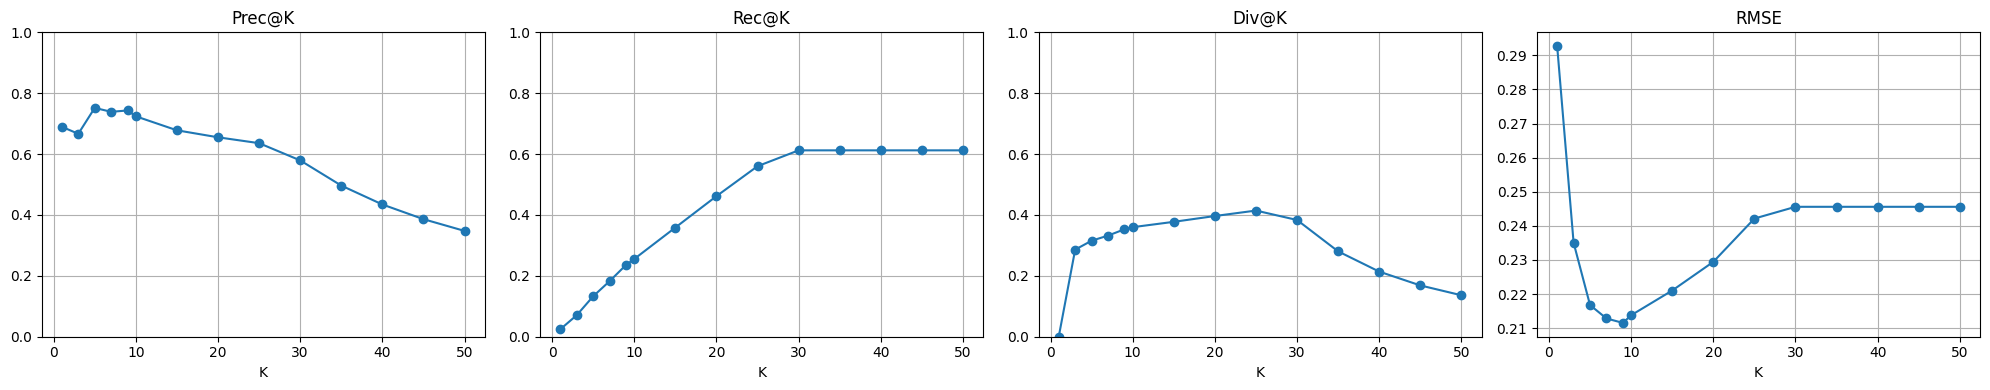

      Prec@K     Rec@K     Div@K      RMSE
K                                         
1   0.689655  0.024418  0.000000  0.292694
3   0.666667  0.070749  0.286128  0.235063
5   0.751724  0.132835  0.315438  0.216782
7   0.738916  0.182521  0.332192  0.212852
9   0.743295  0.235901  0.353008  0.211561
10  0.724138  0.255393  0.359880  0.213802
15  0.678161  0.358629  0.377469  0.221054
20  0.655172  0.461780  0.396553  0.229460
25  0.635862  0.560175  0.414454  0.242153
30  0.579310  0.612281  0.383489  0.245596
35  0.496552  0.612281  0.280366  0.245596
40  0.434483  0.612281  0.213869  0.245596
45  0.386207  0.612281  0.168503  0.245596
50  0.347586  0.612281  0.136178  0.245596


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1) Re‑compute your results for any K’s in one go:
Ks = [1, 3, 5, 7, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50]
results = []
for K in Ks:
    p, r = precision_recall_item_item(combined_sim, gt, K)
    d    = diversity_item_item(combined_sim, K)
    rmse = rmse_reconstruction(X, combined_sim, K)
    results.append({'K': K, 'Prec@K': p, 'Rec@K': r, 'Div@K': d, 'RMSE': rmse})

# 2) Build a DataFrame and set K as the index
df = pd.DataFrame(results).set_index('K')

# 3) Plot all four metrics in a horizontal row
fig, axes = plt.subplots(1, 4, figsize=(20, 4), sharex=True)
metrics = ['Prec@K', 'Rec@K', 'Div@K', 'RMSE']
for ax, metric in zip(axes, metrics):
    ax.plot(df.index, df[metric], marker='o')
    ax.set_title(metric)
    ax.set_xlabel('K')
    ax.grid(True)
    if metric != 'RMSE':
        ax.set_ylim(0, 1)
plt.tight_layout()
plt.show()
print(pd.DataFrame(results).set_index('K'))


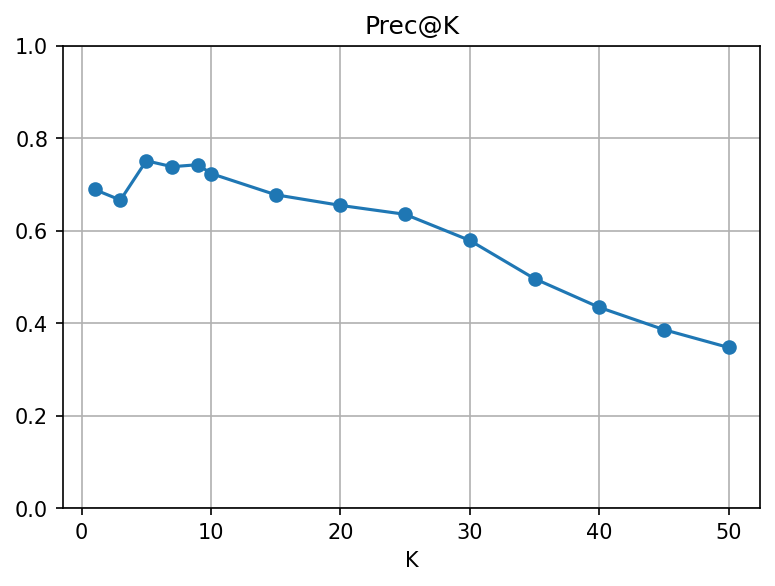

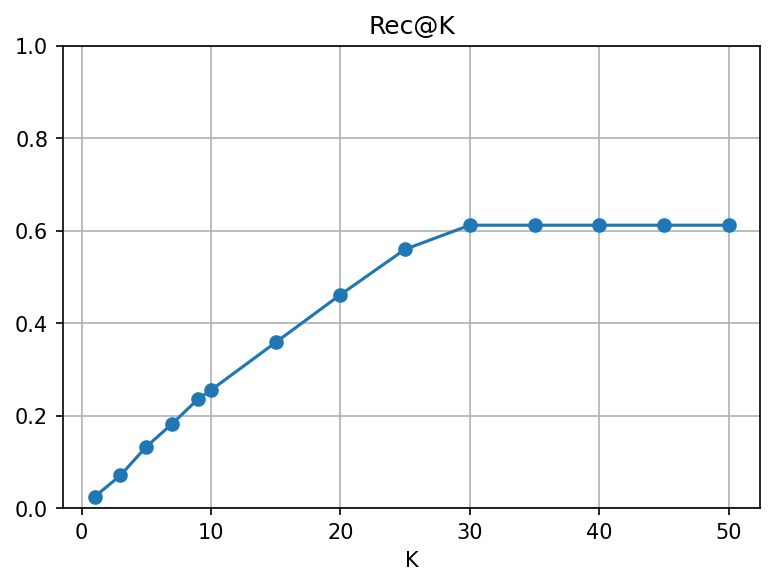

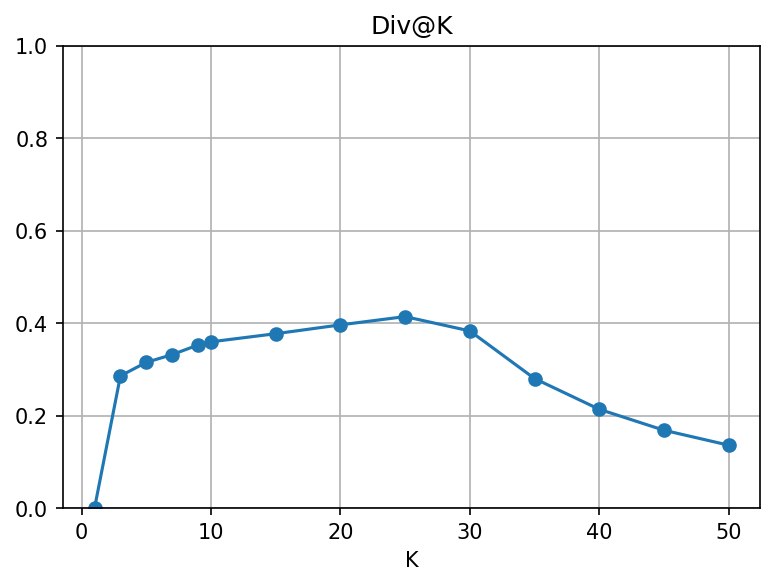

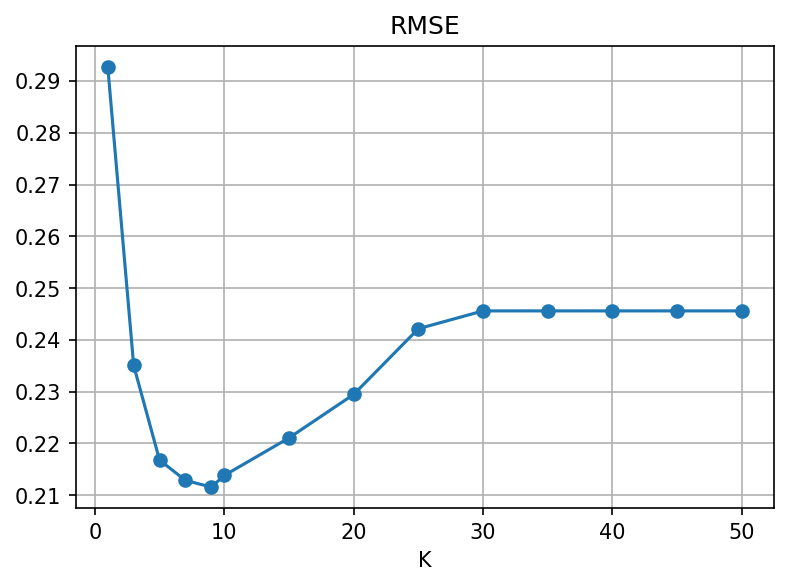

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is already in the namespace
metrics = ['Prec@K', 'Rec@K', 'Div@K', 'RMSE']
filenames = {
    'Prec@K': 'prec_at_k.png',
    'Rec@K':  'rec_at_k.png',
    'Div@K':  'div_at_k.png',
    'RMSE':   'rmse.png'
}

for metric in metrics:
    plt.figure(figsize=(6,4))
    plt.plot(df.index, df[metric], marker='o')
    plt.title(metric)
    plt.xlabel('K')
    plt.grid(True)
    if metric != 'RMSE':
        plt.ylim(0, 1)
    # Save each figure
    plt.savefig(filenames[metric], dpi=150, bbox_inches='tight')
    plt.close()

# Display saved figures
from IPython.display import Image, display
for metric in metrics:
    display(Image(filenames[metric]))


In [ ]:
import pandas as pd

# Build your DataFrame exactly as before
df = pd.DataFrame(results).set_index('K')

# Print the full table
print("Full results:")
print(df)

# Compute and print the average of each column
print("\nAverage across all K:")
print(df.mean())


Full results:
      Prec@K     Rec@K     Div@K      RMSE
K                                         
1   0.689655  0.024418  0.000000  0.292694
3   0.666667  0.070749  0.286128  0.235063
5   0.751724  0.132835  0.315438  0.216782
7   0.738916  0.182521  0.332192  0.212852
9   0.743295  0.235901  0.353008  0.211561
10  0.724138  0.255393  0.359880  0.213802
15  0.678161  0.358629  0.377469  0.221054
20  0.655172  0.461780  0.396553  0.229460
25  0.635862  0.560175  0.414454  0.242153
30  0.579310  0.612281  0.383489  0.245596
35  0.496552  0.612281  0.280366  0.245596
40  0.434483  0.612281  0.213869  0.245596
45  0.386207  0.612281  0.168503  0.245596
50  0.347586  0.612281  0.136178  0.245596

Average across all K:
Prec@K    0.609123
Rec@K     0.381701
Div@K     0.286966
RMSE      0.235957
dtype: float64


In [ ]:
averages = df.mean().to_frame().T
averages.index = ['Average']
df_with_avg = pd.concat([df, averages])

print(df_with_avg)


           Prec@K     Rec@K     Div@K      RMSE
1        0.689655  0.024418  0.000000  0.292694
3        0.666667  0.070749  0.286128  0.235063
5        0.751724  0.132835  0.315438  0.216782
7        0.738916  0.182521  0.332192  0.212852
9        0.743295  0.235901  0.353008  0.211561
10       0.724138  0.255393  0.359880  0.213802
15       0.678161  0.358629  0.377469  0.221054
20       0.655172  0.461780  0.396553  0.229460
25       0.635862  0.560175  0.414454  0.242153
30       0.579310  0.612281  0.383489  0.245596
35       0.496552  0.612281  0.280366  0.245596
40       0.434483  0.612281  0.213869  0.245596
45       0.386207  0.612281  0.168503  0.245596
50       0.347586  0.612281  0.136178  0.245596
Average  0.609123  0.381701  0.286966  0.235957


# With Gradio Interface

## 1. Import Libs

In [ ]:
!pip install gradio
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from PIL import Image
import requests
import io
import gradio as gr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 105.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.4 MB/s eta 0:00:00


## 2.  Preprocess Data

In [ ]:
# Fill missing numeric values
numeric_columns = main_df.select_dtypes(include=['float64', 'int64']).columns
main_df[numeric_columns] = main_df[numeric_columns].fillna(main_df[numeric_columns].mean())

# Normalize selected features
features = ['Protein (g)', 'Fat (g)', 'Carbs (g)', 'Energy (kcal)']
scaler = MinMaxScaler()
main_df[features] = scaler.fit_transform(main_df[features])
main_df = main_df.reset_index(drop=True)

## 3. Compute Similarity Matrices

In [ ]:
# Nutritional similarity
cosine_sim_nutritional = cosine_similarity(main_df[features])

# Combine Name and Allergens for text similarity
main_df['Name_Allergens'] = main_df['Name'].astype(str) + ' ' + main_df['Allergens'].fillna('').astype(str)

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(main_df['Name_Allergens'])


# Text similarity
cosine_sim_text = cosine_similarity(tfidf_matrix, tfidf_matrix)


# Combined similarity
alpha = 0.5
beta = 0.5
combined_sim = alpha * cosine_sim_nutritional + beta * cosine_sim_text

## 4. Define Recommendation Function

In [ ]:
def get_recommendations_for_gradio(item_name):
    global main_df, combined_sim

    num_rec_to_display = 5
    target_item_data_row = main_df[main_df['Name'] == item_name]
    images_to_display = []

    if target_item_data_row.empty:
        return [(None, f"Error: Item '{item_name}' not found.")]

    target_item_data = target_item_data_row.iloc[0]
    target_name = target_item_data['Name']
    target_image_url = target_item_data['Image URL']

    # Add target image
    try:
        response_target = requests.get(target_image_url)
        response_target.raise_for_status()
        img_target = Image.open(io.BytesIO(response_target.content))
        images_to_display.append((img_target, f"Target: {target_name}"))
    except:
        images_to_display.append((None, f"Target Image Error:\n{target_name}"))

    # Get recommendations
    idx = target_item_data_row.index[0]
    sim_scores = list(enumerate(combined_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:num_rec_to_display+1]
    item_indices = [i[0] for i in sim_scores]
    recommended_items_df = main_df[['Name', 'Image URL']].iloc[item_indices]

    for _, row in recommended_items_df.iterrows():
        try:
            rec_response = requests.get(row['Image URL'])
            rec_response.raise_for_status()
            rec_image = Image.open(io.BytesIO(rec_response.content))
            images_to_display.append((rec_image, row['Name']))
        except:
            images_to_display.append((None, f"Image Error:\n{row['Name']}"))

    return images_to_display


## 5. Update get_recommendations_for_gradio() to return HTML

In [ ]:
def get_recommendations(selected_burger, df, similarity_matrix, top_n=5):
    try:
        idx = df[df['Name'] == selected_burger].index[0]
    except IndexError:
        return df.iloc[0:0]  # return empty DataFrame if not found

    similarity_scores = list(enumerate(similarity_matrix[idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    top_indices = [i for i, _ in similarity_scores[1:top_n+1]]
    return df.iloc[top_indices]


In [ ]:
import gradio as gr

def get_recommendations_for_gradio(selected_burger):
    num_recommendations = 5
    result_df = get_recommendations(selected_burger, main_df, combined_sim, num_recommendations)

    try:
        target_row = main_df[main_df['Name'] == selected_burger].iloc[0]
        target_img = target_row['Image URL']
    except:
        return "<p style='text-align:center;'>Selected burger not found.</p>"

    html_output = f"""
    <div style='display:flex; flex-direction:column; align-items:center; justify-content:center; width:100%; padding:20px;'>

        <!-- Target Burger -->
        <div style='text-align:center; margin-bottom:30px;'>
            <h2 style='margin-bottom:10px;'>{selected_burger}</h2>
            <img src='{target_img}' style='max-height:300px; border-radius:12px; box-shadow:0 4px 12px rgba(0,0,0,0.2);'/>
        </div>

        <!-- Recommendations -->
        <div style='display:flex; justify-content:center; flex-wrap:wrap; gap:24px;'>
    """

    for _, row in result_df.iterrows():
        html_output += f"""
            <div style='text-align:center;'>
                <img src='{row["Image URL"]}' style='max-height:220px; border-radius:10px; box-shadow:0 2px 8px rgba(0,0,0,0.15);'/>
                <p style='margin-top:8px;'>{row["Name"]}</p>
            </div>
        """

    html_output += "</div></div>"
    return html_output


In [ ]:
css = """
#centered {
    display: flex;
    flex-direction: column;
    align-items: center;
    justify-content: center;
    margin-top: 60px;
    text-align: center;
}

.center {
    text-align: center;
}
"""

with gr.Blocks(css=css) as demo:
    ...


## 6. Setup Gradio Interface

In [ ]:
main_items = sorted(main_df['Name'].unique())

with gr.Blocks(css="body { background-color: #121212; color: white; font-family: sans-serif; }") as demo:
    with gr.Column(elem_id="centered", scale=1, min_width=400):
        gr.Markdown("## 🍔 Burger Recommendation System", elem_id="title", elem_classes="center")
        gr.Markdown("Select a burger to get similar recommendations based on nutrition and ingredients.", elem_classes="center")

        selected = gr.Dropdown(choices=main_items, label="Select a Burger")
        btn = gr.Button("Submit", variant="primary")
        output = gr.HTML(label="Target & Recommendations")

        btn.click(fn=get_recommendations_for_gradio, inputs=selected, outputs=output)

demo.launch(debug=True, share=True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://3836e3bfefd1e009fd.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://3836e3bfefd1e009fd.gradio.live


# Calorie-Based Interface (Demos)

In [ ]:
import gradio as gr
import pandas as pd

def get_recommendations_for_gradio(selected_burger):
    num_recommendations = 5
    result_df = get_recommendations(selected_burger, main_df, combined_sim, num_recommendations)

    try:
        target_row = main_df[main_df['Name'] == selected_burger].iloc[0]
        target_name = target_row['Name']
        target_img = target_row['Image URL']
        target_description = target_row.get('Description', 'No description available')
        target_allergens = target_row.get('Allergens', 'None listed')
    except IndexError:
        return "<p style='text-align:center; color: white;'>Selected item not found.</p>"

    html_output = f"""
    <div style='display:flex; flex-direction:column; align-items:center; justify-content:center; width:100%; padding:20px; color: white;'>

        <div style='border: 2px solid #777; border-radius: 10px; padding: 20px; width: 70%; display: flex; flex-direction: column; align-items: center; margin-bottom: 15px;'>
            <h2 style='margin-bottom:10px;'>{target_name}</h2>
            <img src='{target_img}' style='max-height:350px; width: auto; border-radius:12px; box-shadow:0 4px 12px rgba(0,0,0,0.2); margin-bottom: 15px;'>
            <p style='font-size:16px; margin-bottom: 10px; text-align: center; white-space: pre-wrap; word-break: break-word;'>{target_description}</p>
            <p style='font-size:16px; text-align: center;'><strong>Allergens:</strong> {target_allergens}</p>
        </div>

        <div style='display:flex; justify-content:space-around; flex-wrap:wrap; gap:30px; width: 90%;'>
    """

    for i, (_, row) in enumerate(result_df.iterrows()):
        name = row['Name']
        image_url = row['Image URL']
        description = row.get('Description', 'No description available')
        allergens = row.get('Allergens', 'None listed')

        item_width = 'calc(50% - 45px)'
        if i == 4:
            item_width = 'calc(100% - 30px)'

        html_output += f"""
            <div style='border: 2px solid #777; border-radius: 10px; padding: 15px; width: {item_width}; display: flex; flex-direction: column; align-items: center;'>
                <h3 style='margin-top:0; margin-bottom: 10px;'>{name}</h3>
                <img src='{image_url}' style='max-height:250px; width: auto; border-radius:8px; box-shadow:0 2px 8px rgba(0,0,0,0.15); margin-bottom: 15px;'>
                <p style='font-size:16px; text-align: center; white-space: pre-wrap; word-break: break-word;'>{description}</p>
                <p style='font-size:16px; text-align: center;'><strong>Allergens:</strong> {allergens}</p>
            </div>
        """

    html_output += "</div></div>"
    return html_output

main_items = sorted(main_df['Name'].unique())

with gr.Blocks(css="body { background-color: #121212; color: white; font-family: sans-serif; } #centered { display: flex; flex-direction: column; align-items: center; }") as demo:
    with gr.Column(elem_id="centered", scale=1, min_width=800):
        gr.Markdown("## 🍔 Burger Recommendation System", elem_id="title", elem_classes="center")
        gr.Markdown("Select a burger to get similar recommendations based on nutrition and ingredients.", elem_classes="center")

        selected = gr.Dropdown(choices=main_items, label="Select a Burger")
        btn = gr.Button("Submit", variant="primary")
        output = gr.HTML(label="Target & Recommendations")

        btn.click(fn=get_recommendations_for_gradio, inputs=selected, outputs=output)

demo.launch(debug=False, share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://53f4877af25ae9a30a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## New Test

In [ ]:
import pandas as pd
import gradio as gr
import itertools
import random

# Load dataset
data_main = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/University Project/mcdonalds_categorized_new.csv')

# Clean and validate dataset
data_main = data_main.dropna(subset=['Name', 'Category', 'Energy (kcal)', 'Image URL'])
data_main = data_main[data_main['Energy (kcal)'] > 0]
available_categories = sorted(data_main['Category'].dropna().unique())

def generate_custom_menus(target_kcal, *counts):
    try:
        target_kcal = int(target_kcal)
    except:
        return "<p style='color:red;'>Please enter a valid number for KCal.</p>"

    # Map counts to category
    category_counts = {cat: count for cat, count in zip(available_categories, counts)}
    total_items_needed = sum(category_counts.values())

    if total_items_needed < 3:
        return "<p style='color:red;'>Please select at least 3 total items.</p>"

    # Prepare pools
    pools = {}
    for category in available_categories:
        count = category_counts[category]
        if count > 0:
            items = data_main[data_main['Category'] == category].to_dict('records')
            if len(items) < count:
                return f"<p style='color:red;'>Not enough items in '{category}' to choose {count}.</p>"
            pools[category] = items

    # Generate menu combinations
    valid_menus = []
    max_attempts = 5000
    attempts = 0



    while len(valid_menus) < 5 and attempts < max_attempts:
        menu = []
        for category, items in pools.items():
            sampled = random.sample(items, category_counts[category])
            menu.extend(sampled)

        total_kcal = sum(item['Energy (kcal)'] for item in menu)
        if abs(total_kcal - target_kcal) <= 100:
            menu_names = sorted(item['Name'] for item in menu)
            if menu_names not in [sorted(item['Name'] for item in m) for m in valid_menus]:
                valid_menus.append(menu)
        attempts += 1

    if not valid_menus:
        return "<p style='color:red;'>No valid menu combinations found. Try adjusting your selections or KCal target.</p>"

    # Display results
    html_output = ""
    for i, menu in enumerate(valid_menus, 1):
        total_kcal = sum(item['Energy (kcal)'] for item in menu)
        html_output += f"<h3 style='text-align:center;'>Menu #{i} – Total: {int(total_kcal)} KCal</h3><div style='display:flex; flex-wrap:wrap; justify-content:center; gap:20px;'>"
        for item in menu:
            html_output += f"""
                <div style='text-align:center; width:160px;'>
                    <img src="{item['Image URL']}" style='max-height:160px; border-radius:10px; box-shadow:0 2px 6px rgba(0,0,0,0.15);'/>
                    <p style='margin-top:5px;'>{item['Name']}<br><small>{item['Energy (kcal)']} KCal</small></p>
                </div>
            """
        html_output += "</div><hr style='margin:30px 0;'>"
    return html_output


# Build UI
with gr.Blocks() as demo:
    gr.Markdown("## 🍔 McDonald's Custom Menu Builder")
    gr.Markdown("🎯 Enter your target calorie value and select how many items you'd like from each category.")

    kcal_input = gr.Textbox(label="Target Total KCal", placeholder="e.g. 1500", type="text")

    sliders = []
    with gr.Row():
        for cat in available_categories[:4]:
            sliders.append(gr.Slider(0, 3, step=1, label=cat, value=1 if cat == "Main" else 0))

    with gr.Row():
        for cat in available_categories[4:]:
            sliders.append(gr.Slider(0, 3, step=1, label=cat, value=0))

    submit = gr.Button("Generate Menus")
    output = gr.HTML()

    submit.click(fn=generate_custom_menus, inputs=[kcal_input] + sliders, outputs=output)

demo.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://13f8265d75716eec3c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import pandas as pd
import gradio as gr
import random

# Load dataset
data_main = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/University Project/mcdonalds_categorized_new.csv')

# Clean and validate dataset
data_main = data_main.dropna(subset=['Name', 'Category', 'Energy (kcal)', 'Image URL'])
data_main = data_main[data_main['Energy (kcal)'] > 0]
available_categories = sorted(data_main['Category'].dropna().unique())

# Helper function to filter items based on protein type
def filter_by_protein_type(df, protein_type):
    if protein_type == 'Meat':
        return df[df['Description'].str.contains('mal', case=False, na=False)]
    elif protein_type == 'Chicken':
        return df[df['Description'].str.contains('toyuq|chicken', case=False, na=False)]
    elif protein_type == 'Fish':
        return df[df['Description'].str.contains('balıq', case=False, na=False)]
    else:
        return df  # No filtering, for 'Other' or if no protein type is selected

def generate_custom_menus(target_kcal, protein_type, *counts):
    try:
        target_kcal = int(target_kcal)
    except:
        return "<p style='color:red;'>Please enter a valid number for KCal.</p>"

    # Map counts to category
    category_counts = {cat: count for cat, count in zip(available_categories, counts)}
    total_items_needed = sum(category_counts.values())

    if total_items_needed < 3:
        return "<p style='color:red;'>Please select at least 3 total items.</p>"

    # Prepare pools
    pools = {}
    for category in available_categories:
        count = category_counts[category]

        # If protein type is selected, filter only for Main category using protein-specific filtering
        if category == 'Main' and protein_type in ['Meat', 'Chicken', 'Fish']:
            filtered_items = filter_by_protein_type(data_main[data_main['Category'] == 'Main'], protein_type)
            items = filtered_items.to_dict('records')
        else:
            # Otherwise, no protein-specific filtering, just use the regular category items
            items = data_main[data_main['Category'] == category].to_dict('records')

        if count > 0 and len(items) >= count:
            pools[category] = items
        elif count > 0 and len(items) < count:
            return f"<p style='color:red;'>Not enough items in '{category}' to choose {count}.</p>"

    # Generate menu combinations
    valid_menus = []
    max_attempts = 5000
    attempts = 0

    while len(valid_menus) < 5 and attempts < max_attempts:
        menu = []
        for category, items in pools.items():
            sampled = random.sample(items, category_counts[category])
            menu.extend(sampled)

        total_kcal = sum(item['Energy (kcal)'] for item in menu)
        if abs(total_kcal - target_kcal) <= 100:
            menu_names = sorted(item['Name'] for item in menu)
            if menu_names not in [sorted(item['Name'] for item in m) for m in valid_menus]:
                valid_menus.append(menu)
        attempts += 1

    if not valid_menus:
        return "<p style='color:red;'>No valid menu combinations found. Try adjusting your selections or KCal target.</p>"

    # Display results
    html_output = ""
    for i, menu in enumerate(valid_menus, 1):
        total_kcal = sum(item['Energy (kcal)'] for item in menu)
        html_output += f"<h3 style='text-align:center;'>Menu #{i} – Total: {int(total_kcal)} KCal</h3><div style='display:flex; flex-wrap:wrap; justify-content:center; gap:20px;'>"
        for item in menu:
            html_output += f"""
                <div style='text-align:center; width:160px;'>
                    <img src="{item['Image URL']}" style='max-height:160px; border-radius:10px; box-shadow:0 2px 6px rgba(0,0,0,0.15);'/>
                    <p style='margin-top:5px;'>{item['Name']}<br><small>{item['Energy (kcal)']} KCal</small></p>
                </div>
            """
        html_output += "</div><hr style='margin:30px 0;'>"
    return html_output


# Build UI
with gr.Blocks() as demo:
    gr.Markdown("## 🍔 McDonald's Custom Menu Builder")
    gr.Markdown("🎯 Enter your target calorie value and select how many items you'd like from each category.")

    kcal_input = gr.Textbox(label="Target Total KCal", placeholder="e.g. 1500", type="text")

    protein_type_dropdown = gr.Dropdown(
        label="Select Protein Type (Chicken, Beef, Fish)",
        choices=["Chicken", "Beef", "Fish", "Other"],
        value="Other",  # Default to 'Other'
        interactive=True
    )

    sliders = []
    with gr.Row():
        for cat in available_categories[:4]:
            sliders.append(gr.Slider(0, 3, step=1, label=cat, value=1 if cat == "Main" else 0))

    with gr.Row():
        for cat in available_categories[4:]:
            sliders.append(gr.Slider(0, 3, step=1, label=cat, value=0))

    submit = gr.Button("Generate Menus")
    output = gr.HTML()

    submit.click(fn=generate_custom_menus, inputs=[kcal_input, protein_type_dropdown] + sliders, outputs=output)

demo.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://313c4384a2fc72a52c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import pandas as pd
import gradio as gr
import random

# Load dataset
data_main = pd.read_csv(
    '/content/drive/MyDrive/Colab Notebooks/University Project/mcdonalds_categorized_new.csv'
)

# Clean and validate dataset
data_main = data_main.dropna(subset=['Name', 'Category', 'Energy (kcal)', 'Image URL'])
data_main = data_main[data_main['Energy (kcal)'] > 0]
available_categories = sorted(data_main['Category'].dropna().unique())

# Helper function to filter items based on protein type
def filter_by_protein_type(df, protein_type):
    if protein_type == 'Meat':
        return df[df['Description'].str.contains('mal', case=False, na=False)]
    elif protein_type == 'Chicken':
        return df[df['Description'].str.contains('toyuq|chicken', case=False, na=False)]
    elif protein_type == 'Fish':
        return df[df['Description'].str.contains('balıq', case=False, na=False)]
    else:
        return df  # No filtering, for 'Other'

# Main generation function
def generate_custom_menus(target_kcal, protein_type, *counts):
    try:
        target_kcal = int(target_kcal)
    except:
        return "<p style='color:red;'>Please enter a valid number for KCal.</p>"

    # Map counts to category
    category_counts = {cat: count for cat, count in zip(available_categories, counts)}
    total_items_needed = sum(category_counts.values())

    if total_items_needed < 3:
        return "<p style='color:red;'>Please select at least 3 categories.</p>"

    # Prepare pools
    pools = {}
    for category in available_categories:
        count = category_counts[category]
        if category == 'Main' and protein_type in ['Meat', 'Chicken', 'Fish']:
            filtered_items = filter_by_protein_type(
                data_main[data_main['Category'] == 'Main'], protein_type
            )
            items = filtered_items.to_dict('records')
        else:
            items = data_main[data_main['Category'] == category].to_dict('records')

        if count > 0:
            if len(items) < count:
                return f"<p style='color:red;'>Not enough items in '{category}' to choose {count}.</p>"
            pools[category] = items

    # Generate menu combinations
    valid_menus = []
    max_attempts, attempts = 5000, 0
    while len(valid_menus) < 5 and attempts < max_attempts:
        menu = []
        for category, items in pools.items():
            sampled = random.sample(items, category_counts[category])
            menu.extend(sampled)

        total_kcal_val = sum(item['Energy (kcal)'] for item in menu)
        if abs(total_kcal_val - target_kcal) <= 100:
            names = sorted(item['Name'] for item in menu)
            if names not in [sorted(item['Name'] for item in m) for m in valid_menus]:
                valid_menus.append(menu)
        attempts += 1

    if not valid_menus:
        return "<p style='color:red;'>No valid menu combinations found. Try adjusting your selections or KCal target.</p>"

    # Build HTML
    html_output = ""
    for idx, menu in enumerate(valid_menus, 1):
        total_kcal_val = sum(item['Energy (kcal)'] for item in menu)
        html_output += f"<h3 style='text-align:center;'>Menu #{idx} – Total: {int(total_kcal_val)} KCal</h3>"
        html_output += "<div style='display:flex; flex-wrap:wrap; justify-content:center; gap:20px;'>"
        for item in menu:
            html_output += f"""
                <div style='text-align:center; width:160px;'>
                    <img src=\"{item['Image URL']}\" style='max-height:160px; border-radius:10px; box-shadow:0 2px 6px rgba(0,0,0,0.15);'/>
                    <p style='margin-top:5px;'>{item['Name']}<br><small>{item['Energy (kcal)']} KCal</small></p>
                </div>
            """
        html_output += "</div><hr style='margin:30px 0;'>"
    return html_output

# Build UI
with gr.Blocks() as demo:
    gr.Markdown("## 🍔 McDonald's Custom Menu Builder")
    gr.Markdown(
        "🎯 Enter your target calorie value and select how many items you'd like from each category."
    )

    kcal_input = gr.Textbox(
        label="Target Total KCal", placeholder="e.g. 1500", type="text"
    )

    protein_type_radio = gr.Radio(
        label="Protein Type",
        choices=["Meat", "Chicken", "Fish", "Other"],
        value="Other",
        interactive=True
    )

    # Use Number inputs with minimum 0 to prevent negatives
    count_inputs = []
    with gr.Row():
        for cat in available_categories[:4]:
            count_inputs.append(
                gr.Number(
                    label=cat,
                    value=1 if cat == "Main" else 0,
                    precision=0,
                    step=1,
                    minimum=0
                )
            )
    with gr.Row():
        for cat in available_categories[4:]:
            count_inputs.append(
                gr.Number(
                    label=cat,
                    value=0,
                    precision=0,
                    step=1,
                    minimum=0
                )
            )

    submit = gr.Button("Generate Menus")
    output = gr.HTML()

    submit.click(
        fn=generate_custom_menus,
        inputs=[kcal_input, protein_type_radio] + count_inputs,
        outputs=output
    )

demo.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://64043d69d7ff668df9.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Deep Learning

In [ ]:
# import pandas as pd
# import numpy as np
# import random

# # Load your dataset
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/University Project/mcdonalds_categorized_new.csv')
# df = df.dropna(subset=['Name', 'Category', 'Energy (kcal)', 'Description'])

# # Add protein type
# def get_protein_type(desc):
#     desc = desc.lower()
#     if 'toyuq' in desc or 'chicken' in desc:
#         return 'chicken'
#     elif 'balıq' in desc:
#         return 'fish'
#     elif 'mal' in desc:
#         return 'meat'
#     return 'other'

# df['ProteinType'] = df['Description'].apply(get_protein_type)
# df = df[df['Energy (kcal)'] > 0].reset_index(drop=True)

# # Create ID mapping
# item_to_id = {name: i for i, name in enumerate(df['Name'].unique())}
# id_to_item = {i: name for name, i in item_to_id.items()}
# category_list = sorted(df['Category'].unique())
# protein_types = ['chicken', 'meat', 'fish']
# num_items = len(item_to_id)


In [ ]:
# samples = []

# def generate_sample():
#     protein_type = random.choice(protein_types)
#     target_kcal = random.randint(600, 1800)

#     # Sample 3–6 categories
#     cat_counts = {cat: random.randint(0, 2) for cat in category_list}
#     if sum(cat_counts.values()) < 3:
#         return None

#     selected_items = []
#     for cat, count in cat_counts.items():
#         if count > 0:
#             items = df[(df['Category'] == cat)]
#             if cat == 'Main':
#                 items = items[items['ProteinType'] == protein_type]
#             if len(items) >= count:
#                 selected_items.extend(random.sample(list(items['Name']), count))

#     if not selected_items:
#         return None

#     # Validate kcal range
#     kcal_total = df[df['Name'].isin(selected_items)]['Energy (kcal)'].sum()
#     if not (target_kcal - 100 <= kcal_total <= target_kcal + 100):
#         return None

#     # One-hot labels
#     y = np.zeros(num_items)
#     for item in selected_items:
#         y[item_to_id[item]] = 1

#     # One-hot protein
#     protein_index = protein_types.index(protein_type)
#     x_protein = np.zeros(len(protein_types))
#     x_protein[protein_index] = 1

#     x_counts = [cat_counts[cat] for cat in category_list]
#     x_input = [target_kcal / 2000] + list(x_protein) + x_counts  # Normalize kcal

#     return x_input, y

# # Generate 5000 samples
# for _ in range(10000):
#     result = generate_sample()
#     if result:
#         samples.append(result)

# X, y = zip(*samples)
# X = np.array(X)
# y = np.array(y)

# print("Training Samples:", len(X))


In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

# model = Sequential([
#     Dense(64, activation='relu', input_shape=(X.shape[1],)),
#     Dense(128, activation='relu'),
#     Dense(256, activation='relu'),
#     Dense(256, activation='relu'),
#     Dense(512, activation='relu'),
#     Dense(1024, activation='relu'),
#     Dense(num_items, activation='sigmoid')  # Multi-label
# ])

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# model.fit(X, y, epochs=100, batch_size=64, validation_split=0.1)
# model.save("menu_recommender_model.h5")


In [ ]:
# import gradio as gr
# import tensorflow as tf

# model = tf.keras.models.load_model("menu_recommender_model.h5")

# def recommend_menu(kcal, protein_type, **category_counts):
#     try:
#         kcal = float(kcal)
#     except:
#         return "Invalid KCal input."

#     if sum(category_counts.values()) < 3:
#         return "Please select at least 3 total items."

#     protein_index = protein_types.index(protein_type)
#     x_protein = [1 if i == protein_index else 0 for i in range(len(protein_types))]
#     x_counts = [category_counts.get(cat, 0) for cat in category_list]
#     input_vector = [kcal / 2000] + x_protein + x_counts
#     pred = model.predict([np.array([input_vector])])[0]

#     top_indices = np.argsort(pred)[::-1]
#     recommended_items = []

#     # Filter by category constraints
#     used_cats = {cat: 0 for cat in category_list}
#     for idx in top_indices:
#         name = id_to_item[idx]
#         item = df[df['Name'] == name].iloc[0]
#         cat = item['Category']

#         if cat == 'Main' and item['ProteinType'] != protein_type:
#             continue

#         if used_cats[cat] < category_counts.get(cat, 0):
#             recommended_items.append(f"{name} ({int(item['Energy (kcal)'])} KCal)")
#             used_cats[cat] += 1

#         if len(recommended_items) >= sum(category_counts.values()):
#             break

#     if not recommended_items:
#         return "No valid combination found."

#     return "\n".join(recommended_items)

# # Build Gradio UI
# with gr.Blocks() as demo:
#     gr.Markdown("### 🍔 Deep Learning Menu Recommender")

#     kcal = gr.Textbox(label="Target KCal", value="1500")
#     protein = gr.Dropdown(choices=protein_types, value="meat", label="Protein Type")
#     sliders = []
#     category_inputs = {}

#     for cat in category_list:
#         slider = gr.Slider(minimum=0, maximum=2, value=1 if cat == "Main" else 0, label=cat, step=1)
#         sliders.append(slider)
#         category_inputs[cat] = slider

#     btn = gr.Button("Recommend Menu")
#     output = gr.Textbox(label="Recommended Menu")

#     btn.click(
#         fn=lambda kcal, protein, *args: recommend_menu(kcal, protein, **dict(zip(category_list, args))),
#         inputs=[kcal, protein] + sliders,
#         outputs=output
#     )

# demo.launch()
